### This notebook is used to train the YOLOv8 model to detect number plates

### Collecting (downloading) dataset to train yolo model

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR-API-KEY")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-6 in yolov8:: 100%|██████████| 20262/20262 [00:03<00:00, 6033.13it/s]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 23.3 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.train(data="/content/names.yaml", epochs=3)


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/names.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/License-Plate-Recognition-6/train/labels.cache... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/License-Plate-Recognition-6/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.13G      1.256      1.452       1.15          4        640: 100%|██████████| 442/442 [02:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.01it/s]


                   all       2048       2195      0.873      0.844      0.886      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      4.04G       1.23     0.8114      1.135          2        640: 100%|██████████| 442/442 [02:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.31it/s]


                   all       2048       2195      0.952      0.895      0.927      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.03G      1.194     0.6975      1.105          1        640: 100%|██████████| 442/442 [02:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.90it/s]

                   all       2048       2195      0.965      0.912      0.949      0.635



3 epochs completed in 0.129 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.02it/s]


                   all       2048       2195      0.964      0.911      0.949      0.635
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train3


In [11]:
import shutil
shutil.make_archive('runs', 'zip', '/content/runs')

'/content/runs.zip'

#### Saving the trained model

In [12]:
import torch

# Assuming 'model' is your trained YOLO model
torch.save(model.state_dict(), 'license_plate_detector.pt')

In [17]:
license_plate_detector = YOLO('/content/runs/detect/train3/weights/best.pt')

In [29]:
results = license_plate_detector.predict('/content/License-Plate-Recognition-6/test/images/008e36a5a0623445_jpg.rf.dd2abb505c87a7cce5b83ce4be13f77c.jpg', conf=0.25)


image 1/1 /content/License-Plate-Recognition-6/test/images/008e36a5a0623445_jpg.rf.dd2abb505c87a7cce5b83ce4be13f77c.jpg: 544x640 1 numberPlate, 23.1ms
Speed: 2.1ms preprocess, 23.1ms inference, 6.0ms postprocess per image at shape (1, 3, 544, 640)


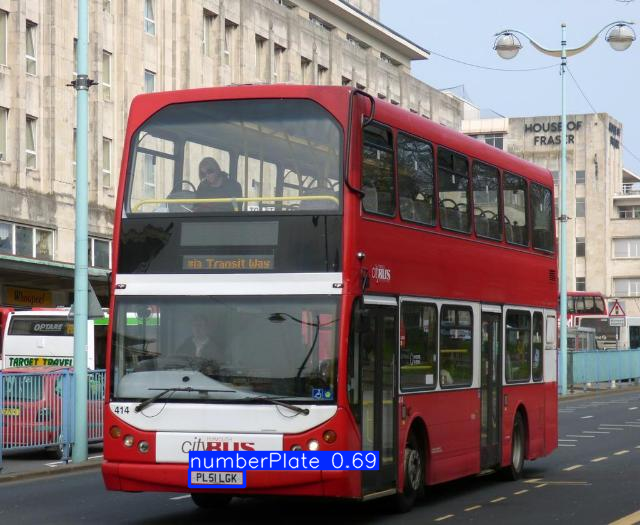

In [30]:
if isinstance(results, list):
    results = results[0]  # Take the first result if it's a list

# Display the results (image with bounding boxes)
results.show()

In [34]:
import os

def get_size(start_path = '/content/License-Plate-Recognition-6'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(f'{get_size()/1000000:.2f}', 'MB')


328.64 MB
